## Water Quality Explanatory Data Analysis?
* Bivariate and multivariate data analysis
* Correlation analysis
* Preprocessing: missing value, train-test split and normalization
* Modelling: Logistic Regression

## Introduction

* Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

* Drinking water and staying hybrated is asconding whit a reduced incidence of urinary tract infections (UTIs), lower blood pressure and heart disease. Therefore drinking water is essential for good heart health.
* Water is the most important nutrient dor the body. It has many benefits for your helps to project you from illness and disease. Water is also an essential part of a healty lifestyle.

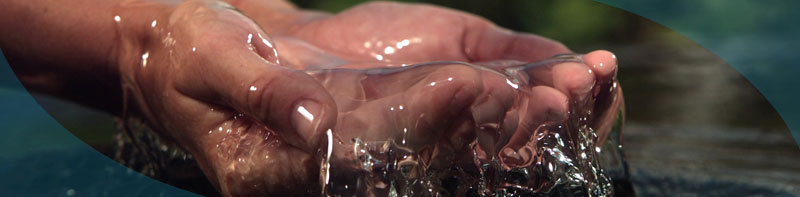

## PATH DIR

In [41]:
import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'/home/epuerta/Academic/AI_DataAnalytics/data/structured_dataset/'

<a id=1></a>
## Python Libraries

In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report

# ML
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# File name
filename = DIR_DATA + 'water_potability.csv'

<a id= 1></a>
## Data Content
1. **pH Value:** PH is an important parameter in evaluating the acid-base balance of water. It also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The curent investigation ranges were 6.52-6.83 which are in the range of WHO standards.
2. **Hardness:** Hardness is mainly caused by calcium and magnesium salts. These salts are dissloved from geologic deposist thtough which water travels. The length of time water is in contact whit hardness producing meterial helps determine how muh hardness there is in raw water. Hardness was orginally defined as the capacity of water to prepitate soap caused by Calcium and Magnesium.
3. **Solids(Total dissolved solids - TDS):** Water has the ability to dissolve a wide range od inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides,magnesium, sulfates etc. These minerals produced un wanted taste and diluted color in appearence of water. This is the important paramater for the use of water. the water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000mg/l which prescribed for drinking purpose.
4. **Chloramines:** Chlorine and chloramine are the major disnifetants used in public water systems. Chloloramines are most commonly formed when ammonia  is added tho chlorine to treat drinking water. Chlorine levels up to 4 miligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
5. **Slfate:** Sulfates are nanturaly occurring substances that are found in minerals, soil and roks. They are perents in ambient air, groundwater, plants and food. The principal commericial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2.700 miligrams per liter(mg/l). It ranges from 3 to 20 mg/l in most freshwater suppiles, although much higher concentretions (100mg/l) are found in some geografic locations.
6. **Conductivity:** Pure water is not a good conductor of electiric current rether's a good insulator. Increase in ions concentration enahances the alectrical conductivity of water. Generaly, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actualy measures the iconic proces of a solution that enables it to transmit current. According to WHO standarts, EC calue should not exceeded 400 mikroS/cm.
7. **Organic_carbon:** Total Organic Carbon(TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in tread / drinking water, and <4mg/Lit int source water which is use for treatment.
8. **Trihalomenthanes:** THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinkin water varies according to the level of organic metarial in the water, the amount of chlorine required to treat the water, and the temperature od the water what is being treated. THM levels up to 80 ppm is considered safe in drinking water.
9. **Turbidity:** The turbidity od water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality od waste discharge with respect to colloided matter. The mean turbility value obtained for Wondo Genet Campus (0.98 NTU) is lower tha the WHO recomended value of 5.00 NTU.
10. **Potability:** Indicates is water is safe for human concumpition where 1 means Potable and 0 means Not potable

<a id=3></a>
## Read and Analyse Data

In [83]:
df = pd.read_csv(filename)

In [84]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [85]:
# describe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<a id=4></a>
## Dependent Variable Analaysis

In [87]:
d =pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values ="Potability", names=["Not Potable", "Potable"], hole = 0.4, opacity=0.8,
            labels={"label":"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text="Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside",textinfo="percent+label")
fig.show()

<a id=5></a>
## Correlation Between Features

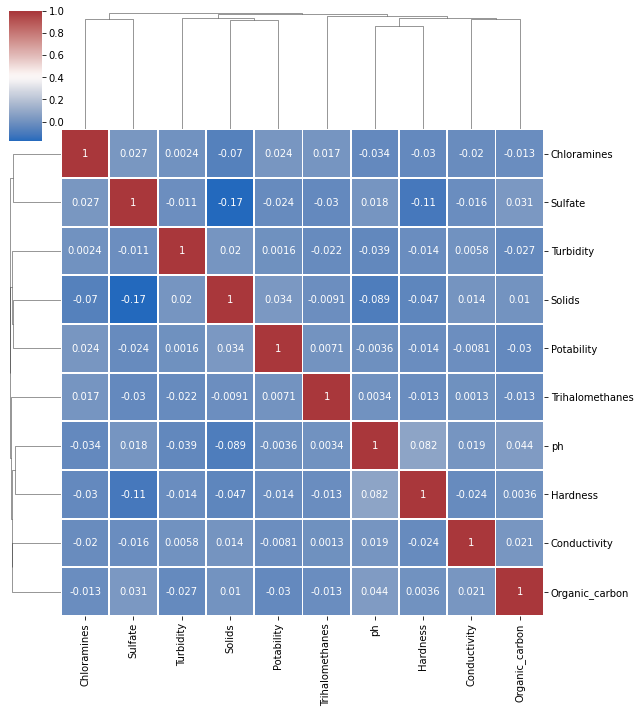

In [88]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

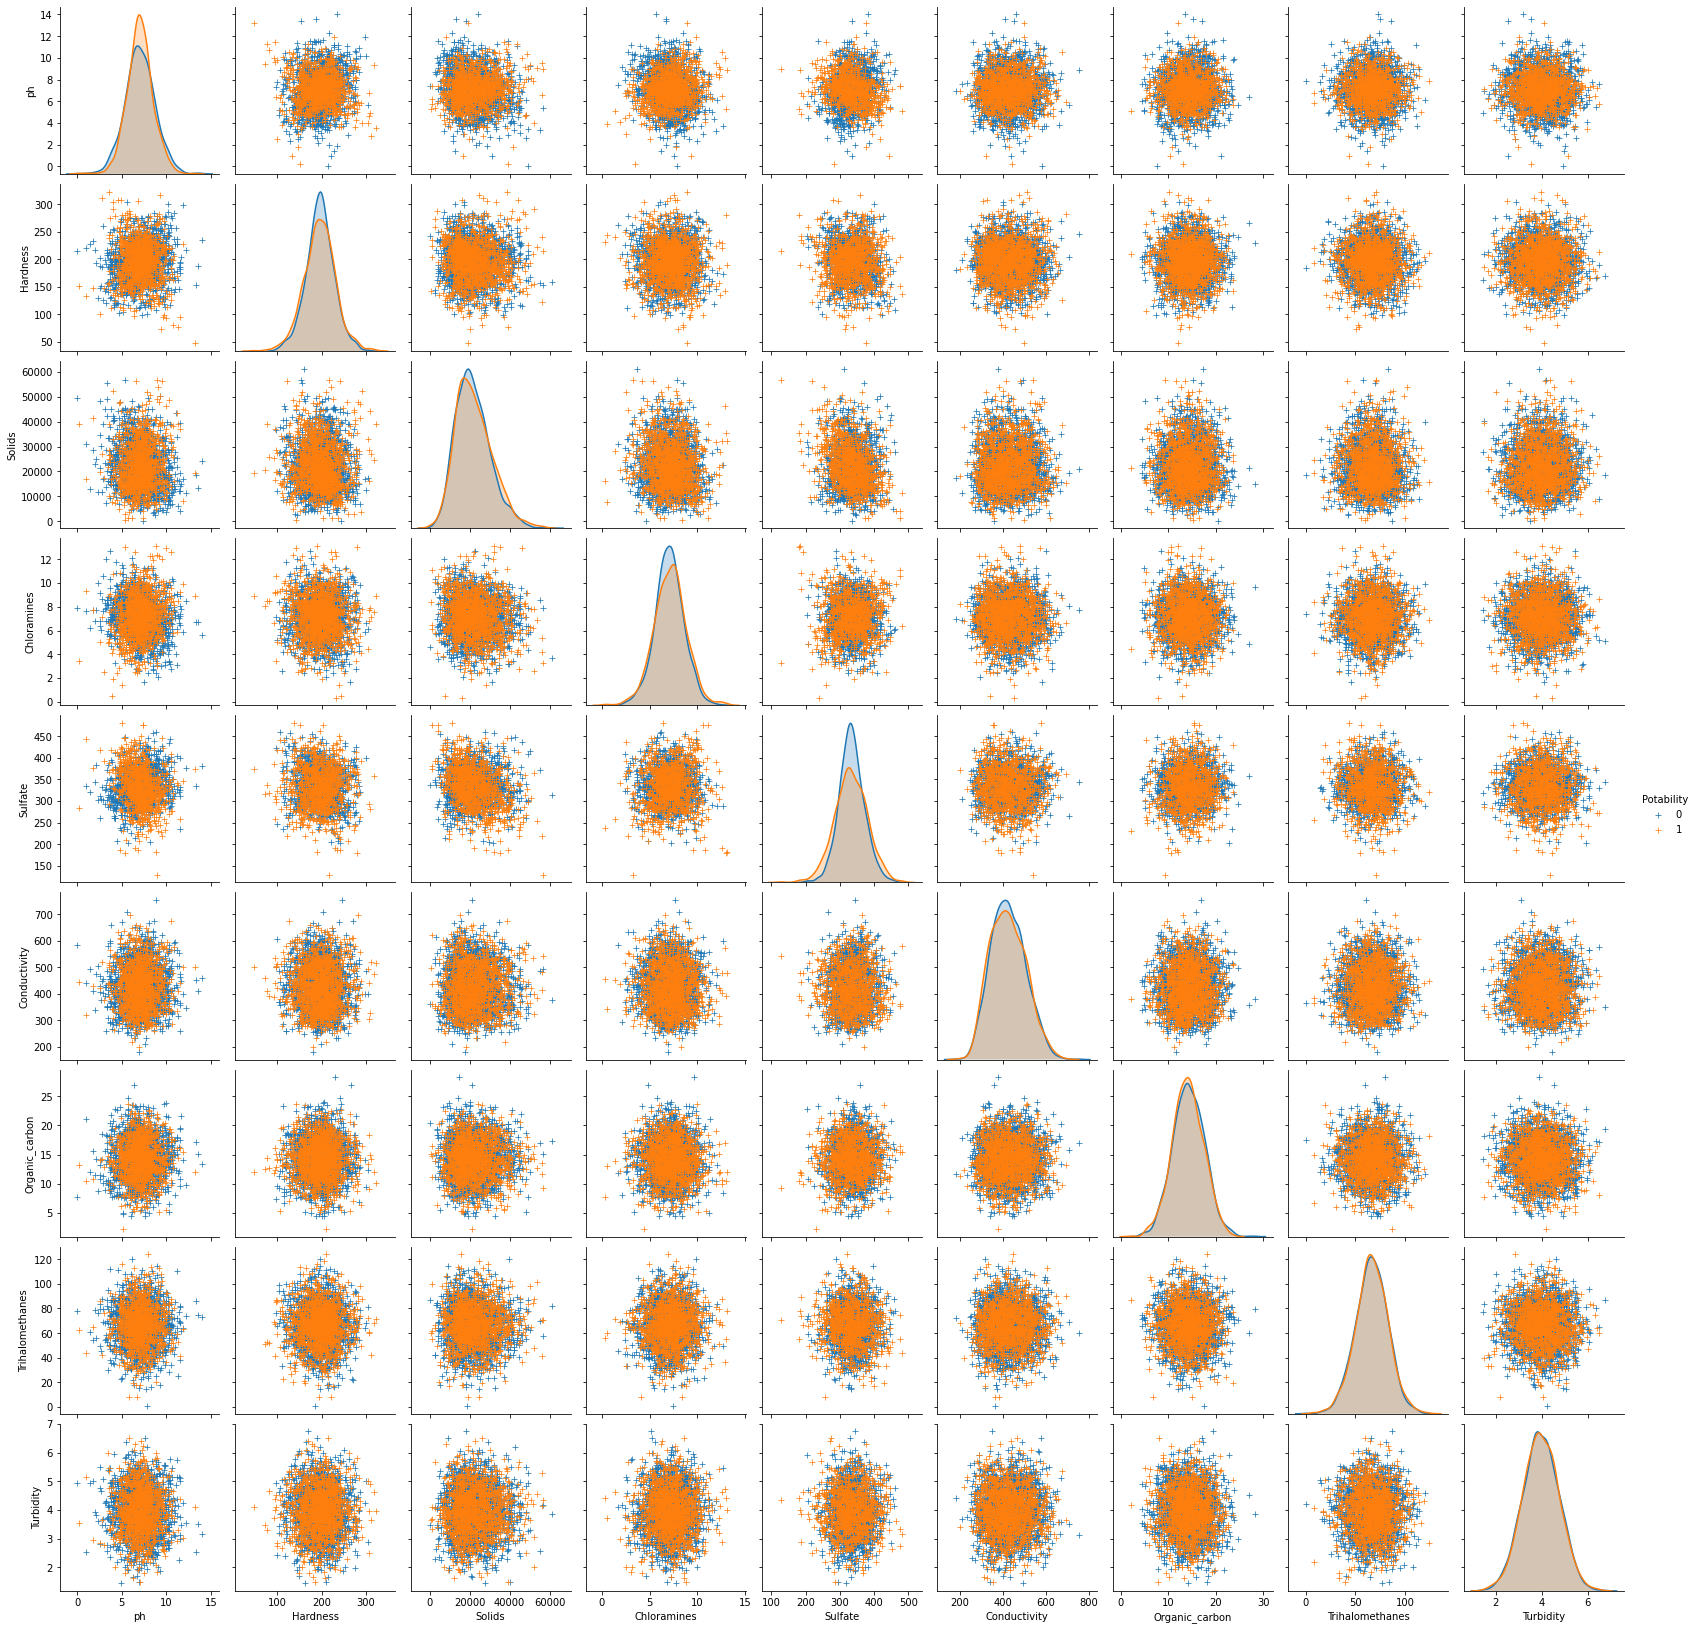

In [89]:
g = sns.pairplot(df, hue='Potability', markers='+')
plt.show()

<a id= 7></a>
## Preprocessing: Missing Value Problem

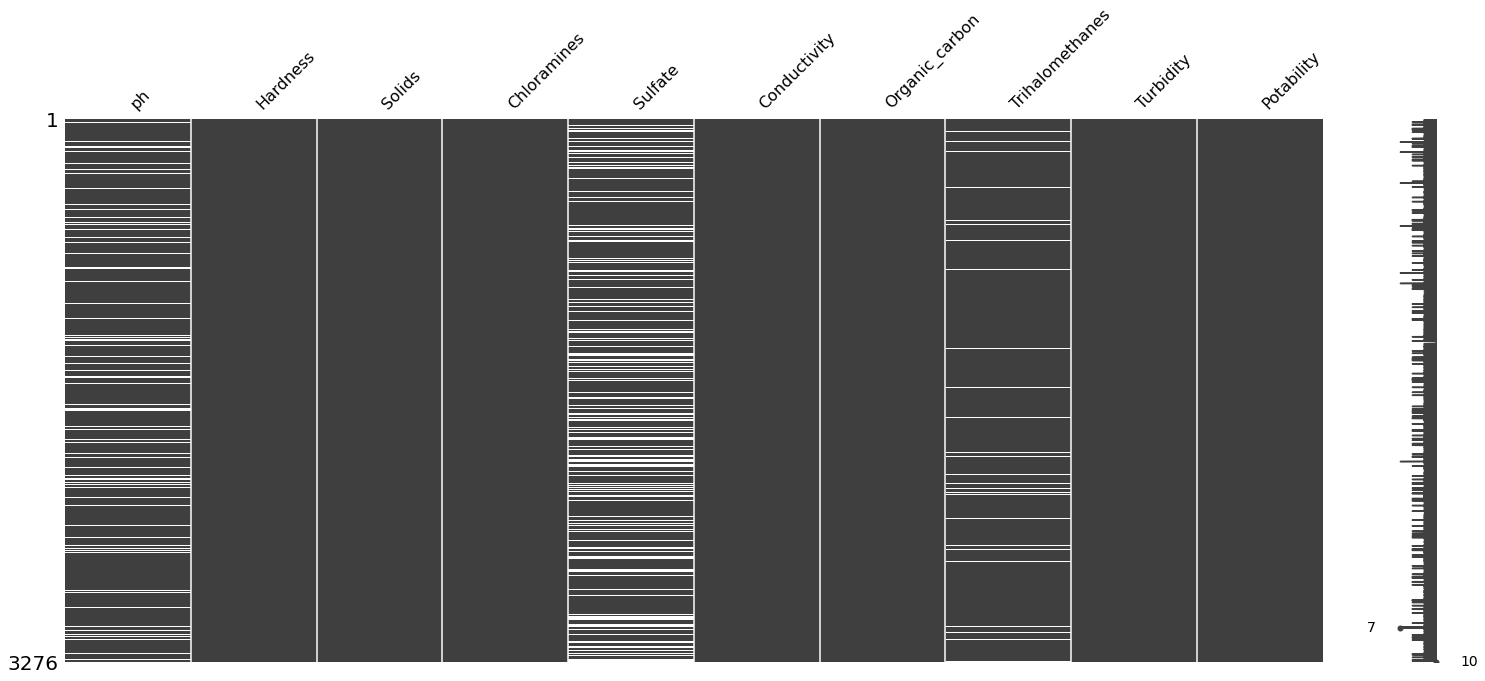

In [90]:
msno.matrix(df)
plt.show()

In [91]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [92]:
# handle missing value with avarage of features
df["ph"].fillna(value = df["ph"].mean(), inplace =True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace =True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace =True)

In [93]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<a id=8></a>
## Preprocessing: Train-Test Split and Normalization

In [94]:
X = df.drop("Potability", axis=1).values
Y = df["Potability"].values

In [95]:
sorted(Counter(Y).items())

[(0, 1998), (1, 1278)]

In [96]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3 , random_state=3)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (2293, 9)
x_test (983, 9)
y_train (2293,)
y_test (983,)


In [97]:
# min-max normalization
x_train_max =np.max(x_train)
x_train_min =np.min(x_train)
X_train= (x_train - x_train_min)/(x_train_max-x_train_min)
X_test= (x_test - x_train_min)/(x_train_max-x_train_min)

<a id=9></a>
## Modelling: Linear regression Classifier

In [98]:
lr = LogisticRegression()

In [99]:
lr.fit(x_train, y_train)

LogisticRegression()

## Accuracy
Precision Score: The precision is the ratio tp/(tp+fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitievly the ability of the classifier not to label as positive a sample that is negative.

In [100]:
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred, normalize=False)

## Confusion matrix

In [101]:
cm = confusion_matrix(y_test, y_pred)

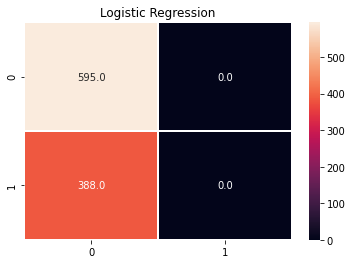

In [102]:
plt.figure()
sns.heatmap(cm , annot =True, linewidth=0.8,fmt=".1f")
plt.title('Logistic Regression')
plt.show()

## Classification report
The classification_report function builds a text report showing the main classification metrics.

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.75       595
           1       0.00      0.00      0.00       388

    accuracy                           0.61       983
   macro avg       0.30      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



/home/epuerta/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Metrics Accuracy, Precision, Recall, F1, MSE

## Nonparametric statistics